<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [50]:
# импортируем библиотеки  

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score

In [51]:
try:
    data=pd.read_csv('/datasets/insurance.csv') 
except:
    data=pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [52]:
print("\nПервые строки датасета")
display(data.head())
print()
print('Общая информация о столбцах и типах данных в них\n')
display(data.info())
print()
print('Основные описательные статистики\n')
display(data.describe())
print()
print('Полных дубликатов:', data.duplicated().sum())  
print('\nКолличество пропусков')
pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient('coolwarm')


Первые строки датасета


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0



Общая информация о столбцах и типах данных в них

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None


Основные описательные статистики



,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000



Полных дубликатов: 153

Колличество пропусков


,0
Пол,0.000000
Возраст,0.000000
Зарплата,0.000000
Члены семьи,0.000000
Страховые выплаты,0.000000


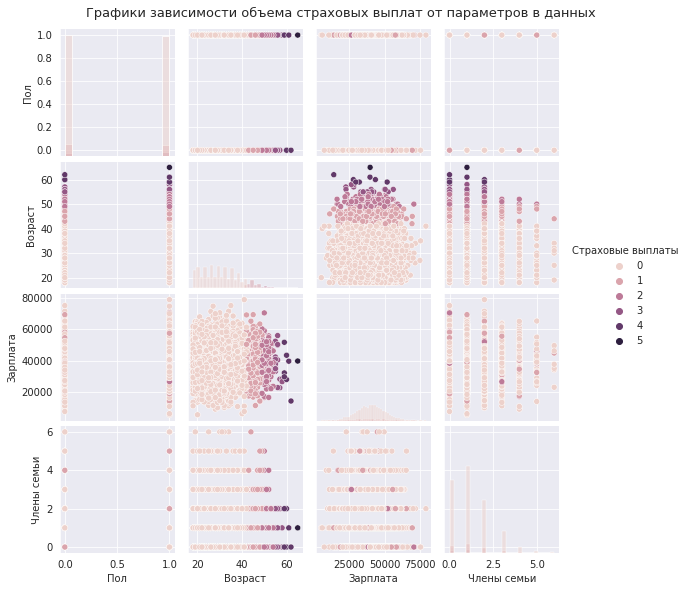

In [53]:
sns.set_style('darkgrid')
sns.pairplot(data, hue='Страховые выплаты', height=2, diag_kind='hist')
plt.suptitle("Графики зависимости объема страховых выплат от параметров в данных", y=1.02, fontsize=13)
plt.show()

Данные содержат 5 коллонок и 5 000 строк.

Пропусков в данных не обнаруженно. 

Обнаруженно 153 полных дубликата, но в представленных данных данные строки могут представлять и разных клиентов, поэтому принято решение их не удалять.

Основываюсь на графике зависимости параметров можно отметить рост колличества кредитов после 40 лет, явной корреляции с другими признаками не преслеживается.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:**

 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 
 a. Изменится. Приведите примеры матриц.
 
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:**  Качество линейной регрессии не изменится.

**Обоснование:** 


При умножении признаков матрицы X размерностью (5000 , 4 ) на обратимую произвольную матрицу P размерностью ( 4 , 4 ) , результатом получаем новый (изменённый) набор данных скалярных произведений размернотью ( 5000 , 4 )

Запишем новое представление формулы предсказания с учетом домнажения на обратную матрицу:

$$
a` = XPw`
$$

Где:
$$
w` = ((XP)^T XP)^{-1} (XP)^T y = (X^TP^TXP)X^TP^Ty= (X^TX)^{-1}(P^T)^{-1}P^{-1}X^TP^Ty
$$

Зная, что при умножение матрицы на обратную ей получается единичная матрица (E):

$$
w` = (X^TX)^{-1}EP^{-1}X^Ty = (X^TX)^{-1}P^{-1}X^Ty
$$

Так как:

$$
w = (X^T X)^{-1} X^T y
$$
$$
w` = P^{-1}w
$$

Таким образом:

$$
a` = XP(P^{-1}w) = Xw = a
$$

Исходная формула вектора предсказаний равна формуле вектора предсказаний в случае, когда мы умножаем матрицу признаков на обратимую матрицу. Исходя из этого можно предположить, что качество линейной регрессии не изменится.

## Алгоритм преобразования

**Алгоритм**

В соответствие с произведенными вычислениями умножим матрицу признаков(Х) на обратимую матрицу в которой все величины сгенерированы случайно (Р).

**Алгоритм 2.0**

- Извлечем матрицупризноков и целевой признак
- Генерируем случайную квадратную обратимую матрицу размером 4х4
- Умножим матрицу признаков на обратимую матрицу Р
- Разделим исходные данные на тренировочную и тестовую выборки
- Разделим преобразованные данные на тренировочную и тестовую выборки
- Создадим класс модели Линейной регрессии
- Обучим модель на первоначальной выборке и расчитаем значение R2
- Обучим модель на преобразованной выборке
- Сравним полученные результаты и сделаем выводы
- Дополнительно : Проверим возможность востановления исходных данных.

**Обоснование**

Качество линейной регрессии не изменится при условии, если исходная матрица невырожденная и квадратная (определитель не равен нулю), так как только для квадратной матрицы может существовать обратная ей.

Теоретически умножая матрицу Х на случайную матрицу Р и на обратную ей Р` мы получим иходную матрицу, что позволяет нам предположить, что подобный метод позволяет как кодировать так и декодировать признаки.
$$
X=PP`X
$$

## Проверка алгоритма

Извлекаем матрицу признаков и целевой признак.

In [54]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

In [55]:
# Создадим рандомную матрицу той же размерности и проверим ее на обратимость
#P = np.random.randn(4, 4)
#try:
#    np.linalg.inv(P)
#    print('Матрица обратима')
#except:
#    print('Матрица не обратима')


Генерируем случайную квадратную обратимую матрицу P размером 4х4

In [56]:
def get_rand_matrix():
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(features.shape[1], features.shape[1]))
        det = np.linalg.det(matrix)
    return matrix


In [57]:
P = get_rand_matrix()
P

array([[-1.29473186,  0.22020871,  0.4274611 ,  0.42568623],
       [-0.44989336, -1.24472772, -0.8248567 , -0.84556235],
       [ 0.39754268, -0.81164525, -1.0851142 ,  1.1045928 ],
       [ 0.81041662, -0.67938555,  1.89525873, -2.35448915]])

Умножим матрицу признаков на обратимую матрицу Р

In [58]:
features_p = features @ P
features_p

,0,1,2,3
0,19699.187033,-40309.097411,-53853.160604,54751.206120
1,15086.737199,-30900.456358,-41270.387657,41933.276118
2,8335.349393,-17080.647353,-22811.318993,23171.927534
3,16569.702869,-33873.104976,-45262.793511,46039.054055
4,10361.972227,-21218.573191,-28344.149083,28806.622072
...,...,...,...,...
4995,14181.297530,-29011.946570,-38757.882323,39405.578307
4996,20816.750525,-42573.211225,-56886.133821,57849.559215
4997,13469.319851,-27541.027299,-36798.077914,37424.075762
4998,12990.884532,-26570.001631,-35495.267870,36094.944472


Разделим исходные данные на тренировочную и тестовую выборки

In [59]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.30, random_state=321)
print('Размеры выборок')
print('features_train','',features_train.shape[0])
print('features_test','',features_test.shape[0])

Размеры выборок
features_train  3500
features_valid  1500


Разделим преобразованные данные на тренировочную и тестовую выборки 

In [60]:
p_features_train, p_features_test, p_target_train, p_target_test = train_test_split(
    features_p, target, test_size=0.30, random_state=321)
print('Размеры выборок')
print('p_features_train','',p_features_train.shape[0])
print('p_features_test','',p_features_test.shape[0])

Размеры выборок
p_features_train  3500
p_features_test  1500


Создадим класс модели Линейной регрессии

In [61]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Обучим модель на первоначальной выборке и расчитаем значение R2

In [62]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
R2 = r2_score(target_test, predictions)
print('Значение метрики R2 на первоначальной выборке: ',round(R2,5))

Значение метрики R2 на первоначальной выборке:  0.40801


Обучим модель на преобразованной выборке

In [63]:
model_p = LinearRegression()
model_p.fit(p_features_train,p_target_train)
predictions_p = model_p.predict(p_features_test)
R2_p = r2_score(p_target_test, predictions_p)
print('Значение метрики R2 на преобразованной выборке: ',round(R2_p,5))

Значение метрики R2 на преобразованной выборке:  0.40801


При умножении признаков на обратимую матрицу качество модели не изменилось.

Проверим возможность востановления исходных данных.

In [64]:
display(features,(features_p @ np.linalg.inv(P)))

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.570639e-12,46.0,38000.0,1.000000e+00
2,-2.484604e-12,29.0,21000.0,-1.147380e-12
3,-1.451206e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.927767e-12
...,...,...,...,...
4995,-2.235601e-12,28.0,35700.0,2.000000e+00
4996,-7.756185e-12,34.0,52400.0,1.000000e+00
4997,-2.447793e-12,20.0,33900.0,2.000000e+00
4998,1.000000e+00,22.0,32700.0,3.000000e+00


Данные удалось востановить

Вывод:
Путем умножения на обратимую матрицу P мы зашифровали данные пользователей, не потеряв в качестве модели. 

**Вывод 2.0**

Целью данной работы была обозначенна защита данных клиентов компании «Хоть потоп».

Для работы был предоставлен датасет содержащий 5 колонок и 5 000 строк.
При первоначальном осмотре пропусков в данных обнаруженно не было. Выявленные полные дубликаты (153 строки) из-за специфики данных были сохранены. При рассмотрении зависимости параметров, можно отметить рост колличества кредитов после 40 лет, явной корреляции с другими признаками не преслеживается.

Была поставленна задача разработать метод преобразования данных, ослажняющий восстановление персональной информации, но не ухудшающий качество моделей машинного обучения.

С целью реализации данной задачи признаки исходной матрицы X размерностью (5000 , 4 ) были умноженны на обратимую квадратную случайно сгенерированныу матрицу P размерностью ( 4 , 4 ) , результатом был получен новый (изменённый) набор данных скалярных произведений размернотью ( 5000 , 4 ). 

Это позволило закодирать данные пользователей.

С целью проверки корректности работы выбранного нами метода были обученны две модели Линейной регрессии. На исходных и на преобразованных данных. Для проверки корректности была использованна метрика R2, что позволило определить, что качество моделей идентично.

Финальной частью исследования стала проверка возможности востановления данных. Декодирование было произведено успешно. Это позволяет утверждать, что цель данной работы была достигнута.